# What is the best neighborhood in Pittsburgh?
##### By Team Catnip🌿
##### Makayla Chang & Dylan Dimond & Tingxu Chen

### **1. Our Metric**
We used three datasets — **police arrest data** , **311 call data** , and **Allegheny County assets data** —to evaluate neighborhood quality across Pittsburgh. These datasets capture three *key components* of what we define as the "best" neighborhoods: **safety** , **low complaint volume** , and  **access to public assets that support community well-being** . Each submetric is scored on a **100-point scale**, and the final score for each neighborhood is calculated as the **average** of the three submetrics.

### **2. Submetric-1: Police Arrest Data**
### *2.1 What is the dataset about?*
The Pittsburgh Police Arrest Data provides detailed information on individuals taken into custody by City of Pittsburgh police officers. It includes data such as age, gender, race, arrest time and location, offenses, and neighborhood-level incident details. The dataset covers arrests from March 11, 1998, to November 14, 2023, after which it ceased updating due to a transition to a new records management system. ​
### *2.2 Why did we choose the police arrest data?*
We selected the police arrest data because it offers a direct measure of public safety within neighborhoods. Arrest records, especially for serious offenses, reflect areas where law enforcement activity is concentrated, indicating potential safety concerns. Analyzing this data helps identify patterns and trends in criminal activity, which are crucial for assessing neighborhood safety.​
WPRDC Data
### *2.3 How does it contribute to the final score?*
In our neighborhood evaluation metric, the police arrest data serves as the "safety" submetric. We calculate a score based on the frequency and severity of arrests in each neighborhood, normalized on a 100-point scale. This safety score is then averaged with scores from other submetrics—such as 311 call data and public assets data—to derive the final overall score for each neighborhood.
### *2.4 Result for submetric-1*


In [16]:
import pandas as pd
result_1 = pd.read_csv("Dylan - Arrest Analysis/result.csv")
result_1 = result_1.rename(columns={"INCIDENTNEIGHBORHOOD":"hood"})
print(result_1.head(11))

    Unnamed: 0               hood  ARREST_COUNT      score
0           18  Central Northside            23  99.654031
1           64          Ridgemont            37  99.443442
2           63      Regent Square            37  99.443442
3           52      New Homestead            39  99.413357
4           79     Swisshelm Park            43  99.353189
5           25      East Carnegie            48  99.277978
6           75          St. Clair            55  99.172684
7           78        Summer Hill            76  98.856799
8           56            Oakwood            82  98.766546
9           35               Hays           120  98.194946
10          87            Windgap           124  98.134777


### *2.5 Discussion for submetrix-1*
We calculated a safety score for each neighborhood using the formula 
((6648−arrest count)/6648)×100, where 6648 is an adjusted total (about 10% of the overall arrest count) used to amplify differences between neighborhoods. This approach gives higher scores to areas with fewer arrests, helping highlight variations in safety more clearly. For example, Central Northside, with just 23 arrests, scores 99.65, while Hays, with 120 arrests, scores 98.19—demonstrating how even moderate differences in arrest counts affect the ranking under this scaled metric.


### **3. Submetric-2: 311 Data**
### *3.1 What is the dataset about?*
The Pittsburgh 311 Data comprises service requests submitted by residents to the City's 311 Response Center. These requests, collected via phone calls, emails, tweets, the city website, and a mobile application, encompass a range of non-emergency issues such as potholes, graffiti, and streetlight outages. Each entry includes details like request type, submission method, status, assigned department, and neighborhood location. The dataset covers requests from April 20, 2015, to February 4, 2025, after which updates ceased due to a system transition.
### *3.2 Why did we choose the police arrest data?*
We selected the 311 data because it offers direct insight into residents' concerns and the responsiveness of city services. A higher volume of 311 requests in a neighborhood may indicate underlying issues affecting quality of life or a more engaged community actively reporting problems. Analyzing this data helps identify areas where public services may need improvement or where community engagement is particularly strong.
### *3.3 How does it contribute to the final score?*
In our evaluation, the 311 data serves as the "community concern" submetric. We calculate a score for each neighborhood based on the number of 311 requests, normalizing the data to a 100-point scale where fewer requests result in a higher score. This score is then averaged with other submetrics, such as police arrest data and public assets data, to determine the neighborhood's overall quality score.
### *3.4 Result for submetric-2*

In [10]:
result_2 = pd.read_csv("Makayla - 311 data analysis/311_counts_by_neighborhood.csv")
print(result_2.head(11))

                 hood  request_count  score
0            Sheraden              2  99.93
1              Esplen              2  99.93
2           Fairywood              2  99.93
3       New Homestead              3  99.90
4                Hays              3  99.90
5            Westwood              4  99.87
6            West End              4  99.87
7             Elliott              5  99.83
8             Windgap              5  99.83
9       Homewood West              6  99.80
10  Arlington Heights              6  99.80


### *3.5 Discussion for submetric-2*
The 311 request scores provide valuable insight into perceived quality of life across Pittsburgh neighborhoods. Neighborhoods like Sheraden, Esplen, and Fairywood, which had very few reported service issues, scored at the top, suggesting relatively low levels of public concern or disruption. Notably, New Homestead also scored high in this analysis — consistent with its strong performance in the police arrest dataset — reinforcing the reliability and alignment of our results. We used the same method as in the police arrest metric, applying the formula score = ((2982−request_count)/2982)×100 to emphasize differences across neighborhoods and capture the relative scale of reported issues.

### **4. Submetric-3: Public Assets**
### *4.1 What is the dataset about?*

- This dataset is basically a "public facilities map" of each district in Pittsburgh - from parks, libraries, schools, community centers, to supermarkets and clinics, from local to federal sources.
- It was originally used for the 2020 census, but for us, it is more like answering a question: **Is a community really suitable for people to live in?**

### *4.2 Why did we choose the public assets data?*

- Because it's simple: **Can you walk out of the door? Is there a place to eat, see art exibitions, and buy groceries?** These are the key to whether a community is `livable`. If these facilities are scarce or far away, life is a hassle.
- And, to be honest, we are students, not looking for retirement homes, nor choosing a site to support our families. What we care more about is - is there good food? Is this place modern? Can I find a pub with friends to sit for a night? Is there a place suitable for a date? We care about the `feeling of life`, not "cheapest" or "quietest".
- The complete asset data is actually very comprehensive, with schools, hospitals, and various types of public facilities. But when analyzing, we specifically picked out the part that is most relevant to the `atmosphere of life`: restaurants, cafes, supermarkets, libraries, museums, public art... **What we want to find is not the most practical, but the most exciting.**
- The score of this part is actually answering a question: **When you are in the most exciting years of your life and want to discover the most exciting colors in the world, where is the place that will make you stop and want to stay a little longer? This is what we understand as the `heartbeat index`.**

### *4.3 How does it contribute to the final score?*

- In our system, this set of "living facilities" data is used to calculate the resource reachability score of a community, but the resources we focus on are not the traditional "functional rigid needs" such as schools and hospitals, but those small places that can ignite the passion for life.
- We counted the number of facilities related to life aesthetics in each community, such as restaurants, cafes, supermarkets, public art, museums, etc., and then standardized them to a 100-point system according to the proportion. **The higher the score, the more likely this place is to give you a romantic surprise on ordinary days.**
- Finally, this score is averaged with two other sub-indicators (police arrest data and 311 call data) to form the final score of each community. It can be said that this part represents the `life heat` and `emotional temperature` in our minds.

### *4.4 Result for submetric-3*
- Central Business District, Squirrel Hill South and Shadyside have significantly higher scores. They not only have convenient facilities, but also have rich life scenes and cultural atmosphere. They are the easiest places for people to stop in the city.

In [8]:
result_3 = pd.read_csv("tingxu_vibe_score/tingxu_final_score.csv")
result_3["heartmap_score"]= result_3["heartmap_score"]*100
result_3 = result_3.rename(columns={"heartmap_score":"score"})
print(result_3.head(11))

    Unnamed: 0                       hood      score
0            0  Central Business District  91.646814
1            1        Squirrel Hill South  84.364189
2            2                  Shadyside  83.839319
3            3           South Side Flats  83.423237
4            4              North Oakland  83.422938
5            5                 Bloomfield  77.281076
6            6               East Liberty  73.859151
7            7             Strip District  71.743168
8            8                  Brookline  60.999194
9            9           Allegheny Center  56.846084
10          10   Lincoln-Lemington-Belmar  56.429949


### *4.5 Discussion for submetric-3*
- This sub-indicator allows us to see the huge differences in the "life atmosphere" of different communities in Pittsburgh. It not only reveals which places are rich in resources and charming atmosphere, but also makes us notice that some areas may need more attention and investment to truly become a heart-warming living space.

### **5. Composite score calculation**

We calculate the final composite score using the following weights:
- Safety (submetric-1): 35%
- Responsiveness (submetric-2): 35%
- Amenities (submetric-3): 30%

This weighting scheme aims to balance the influence of all three factors while giving slightly more importance to the fundamental quality-of-life indicators — safety and service responsiveness.

Below, we present the top ten neighborhoods based on the composite score.

In [ ]:

temp = pd.merge(result_1, result_2, on="hood")
comp_score = pd.merge(temp, result_3, on="hood")
comp_score = comp_score.rename(columns= {
    "score_x":"Safety Index",
    "score_y":"Responsiveness Index",
    "score":"Amenity Index"

})
comp_score["Composite score"]=comp_score["Safety Index"]*0.35+comp_score["Responsiveness Index"]*0.35+comp_score["Amenity Index"]*0.3
sorted = comp_score.sort_values(by="Composite score",ascending = False)
print(sorted[["hood","Composite score","Safety Index","Responsiveness Index","Amenity Index"]].head(11))


                   hood  Composite score  Safety Index  Responsiveness Index  \
32        North Oakland        88.322924     93.155836                 87.69   
47  Squirrel Hill South        87.628787     87.785800                 90.27   
35       Strip District        86.386285     92.433815                 92.89   
53            Shadyside        85.346232     85.394103                 86.59   
18  Squirrel Hill North        83.337184     95.637786                 95.10   
22         Point Breeze        81.302158     95.472323                 93.39   
0     Central Northside        81.144705     99.654031                 91.18   
63            Brookline        80.792768     79.091456                 99.46   
5        Allegheny West        80.445686     98.044525                 97.22   
19           Banksville        79.401385     95.622744                 92.45   
48          North Shore        78.844534     87.755716                 97.05   

    Amenity Index  
32      83.422938  

### 🎉 Congratulations, North Oakland!🎉



The score distribution follows an approximately normal curve, which supports the statistical reliability of our approach. Below is a histogram visualizing this distribution.

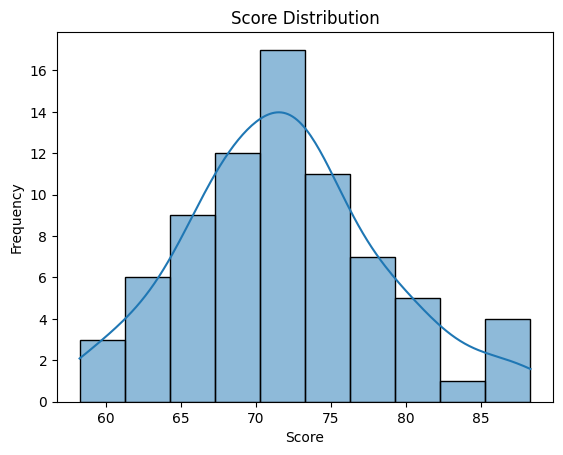

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(sorted["Composite score"],bins=10,kde=True)
plt.title("Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


Below is a spatial map showing how scores are distributed across Pittsburgh neighborhoods.



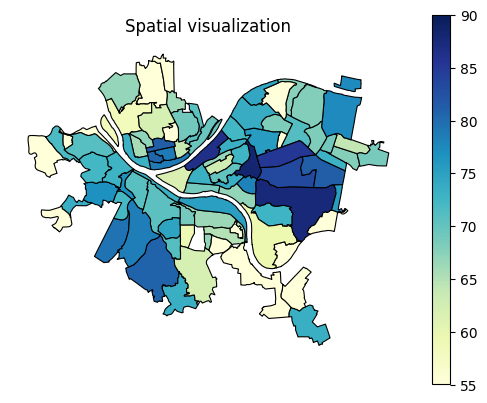

In [81]:
import geopandas as gpd
import pandas as pd

geo = gpd.read_file("Makayla - 311 data analysis/Neighborhood boundaries/neighborhoods (1)/Neighborhoods_.shp") 
merged = geo.merge(sorted,on="hood",how="left")
merged["Composite score"] = merged["Composite score"].fillna(0)
merged.plot(
    column= "Composite score",
    cmap = "YlGnBu",
    legend=True,
    edgecolor="black",
    linewidth=0.8,
    vmin=55,
    vmax=90
)
plt.title("Spatial visualization")
plt.axis("off")
plt.show()

### *6. Conclution*
In this project, we set out to define and identify the “best” neighborhoods in Pittsburgh using a data-driven, multi-dimensional approach. By leveraging publicly available datasets—police arrest data, 311 service request data, and Allegheny County public asset records—we built a composite scoring system that reflects neighborhood safety, quality of life, and access to public resources.

Each submetric was normalized on a 100-point scale to allow for fair and meaningful comparisons. We applied consistent logic across all datasets to ensure the scores captured real variation—highlighting both neighborhood strengths and areas for improvement. For example, New Homestead consistently ranked high in both arrest and 311 analyses, reinforcing the validity of our scoring framework.

To balance fairness and priority, we weighted the final score as follows: 35% for safety index, 35% for responsiveness index (311 service calls), and 30% for Amenity Index.

North Oakland emerged as Pittsburgh’s top-ranked neighborhood with a composite score of 88.32! With an impressive 93.16 in safety, 87.69 in responsiveness, and a strong 83.42 in access to amenities, North Oakland stands out as a well-rounded leader in community well-being. 

Our final results follow an approximately normal distribution, lending statistical credibility to our method. A histogram visualizes the distribution of scores, while a spatial map reveals how neighborhood conditions vary across the city.

Ultimately, this project offers a transparent, replicable framework for evaluating neighborhood conditions in Pittsburgh. While no single score can fully capture the richness of lived experiences, this analysis provides a solid foundation for more informed urban planning, policymaking, and community engagement. We hope it sparks conversation—and maybe even a little friendly neighborhood competition—as we all work toward a more vibrant, equitable Pittsburgh!!!